In [1]:
import torch
from torchvision import transforms
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
from instrumented_models.swin_instrumented import SwinTiny_InternalRepresentation

model = SwinTiny_InternalRepresentation(num_classes=70, pretrained=False)

weights = torch.load("swin_epoch_25.pth", map_location=device)
weights = {"model." + k: v for k, v in weights.items()}
model.load_state_dict(weights)

model.to(device)
model.eval()

print(model.__class__.__name__)

num_params = sum(p.numel() for p in model.parameters())
print(f"model parameters: {num_params}")

d:\conda_envs\fyp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SwinTiny_InternalRepresentation
model parameters: 27573184


In [4]:
img_path = "a5-jsw-1_crop.jpg"
image = Image.open(img_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0).to(device)

# Forward pass
with torch.no_grad():
    output = model(input_tensor)

# Extract spatial attention maps and channel (token embedding) activations
attn_maps = model.get_attention_maps()
channel_acts = model.get_channel_activations()

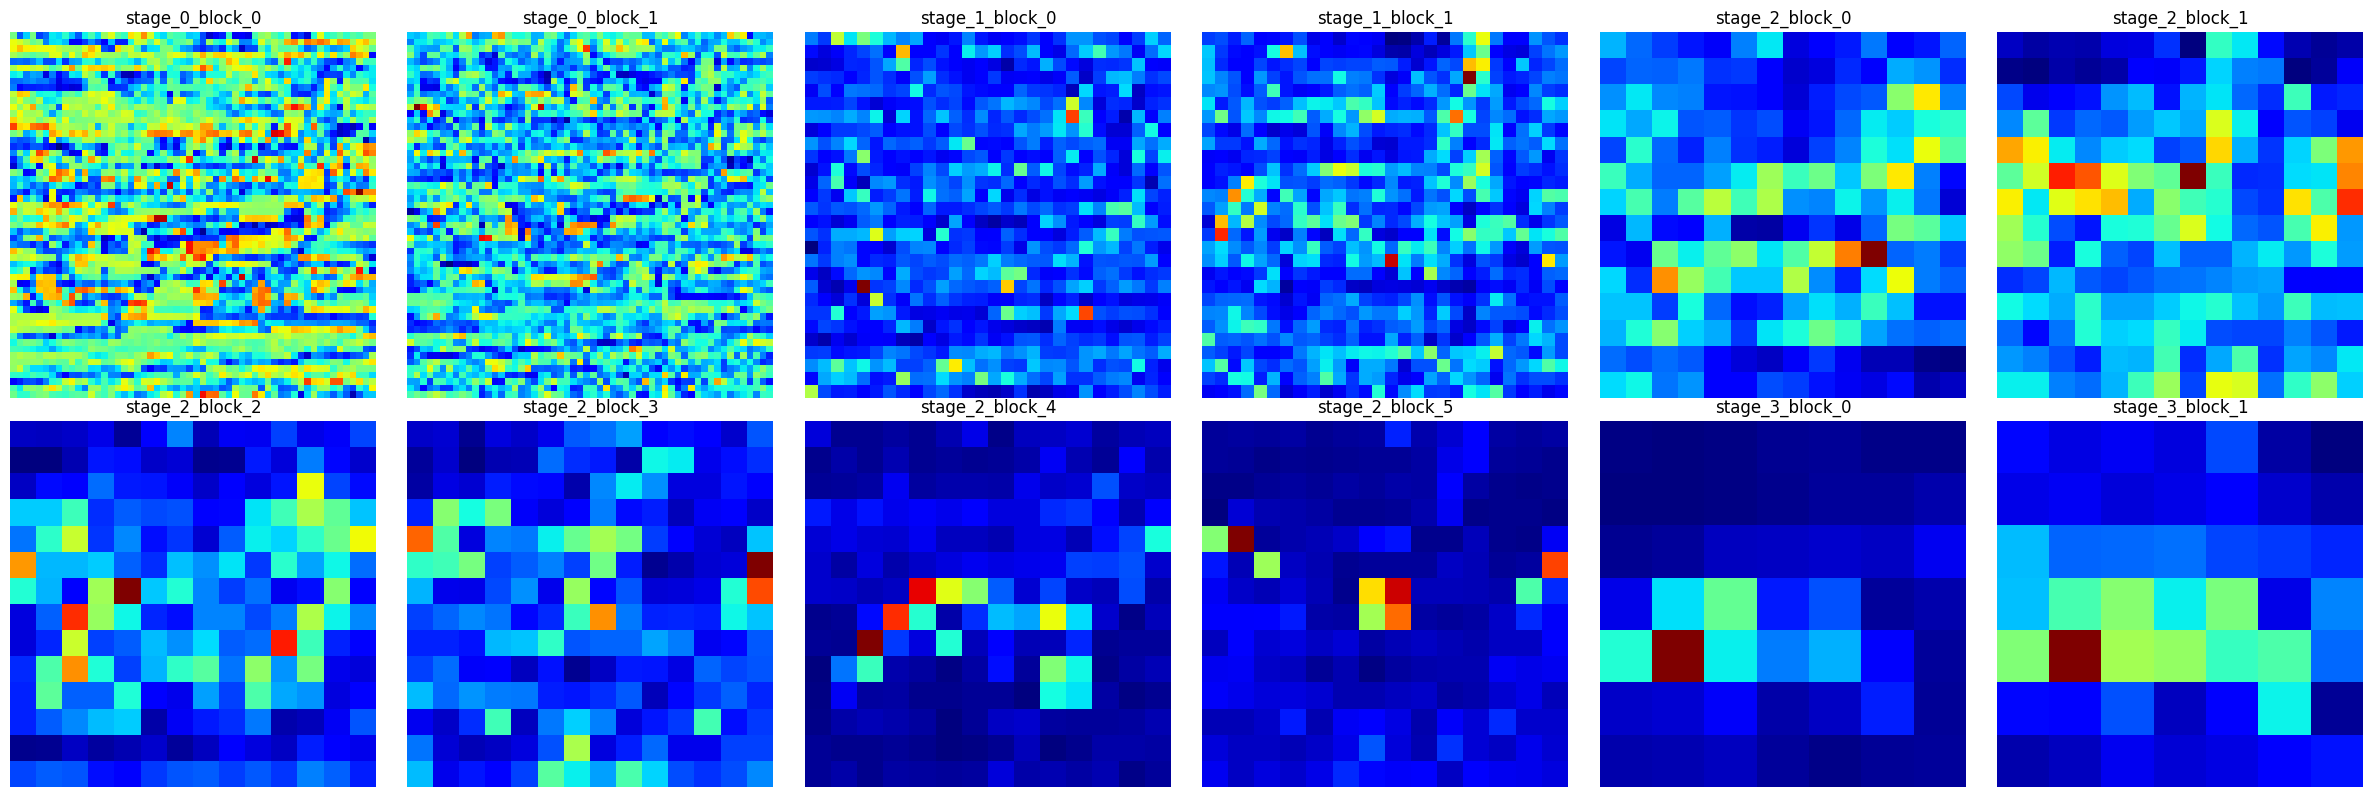

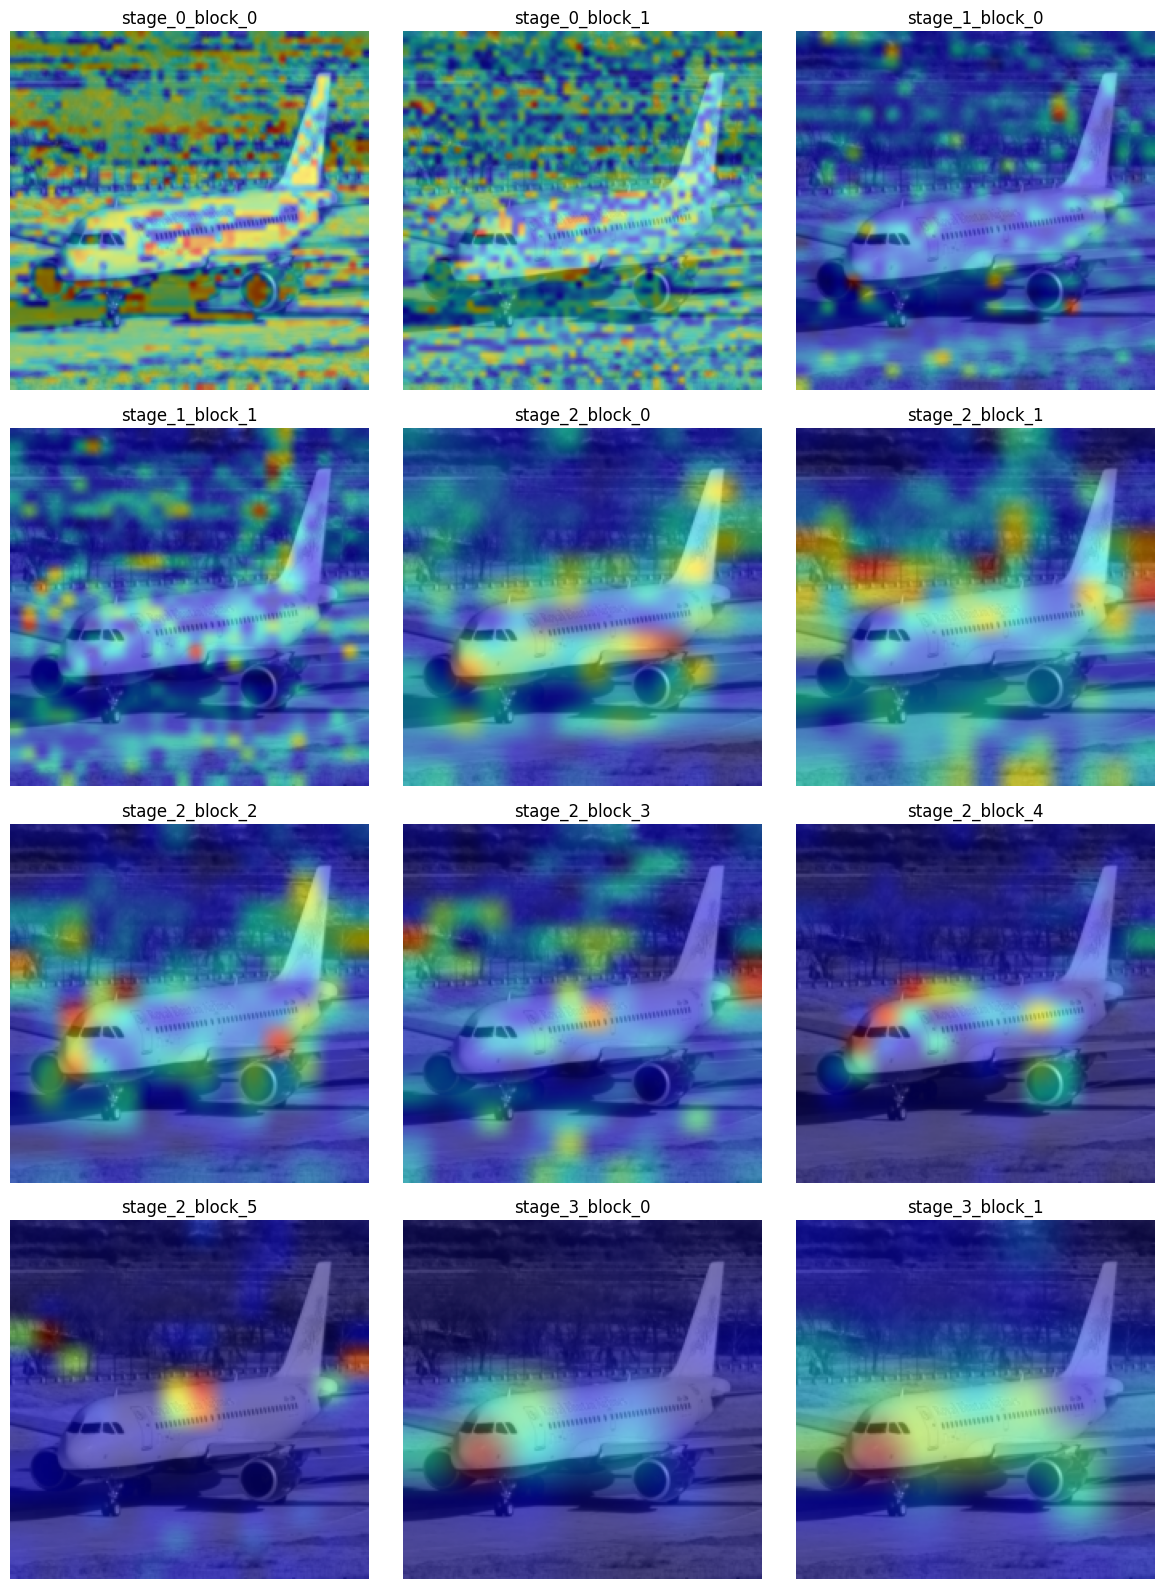

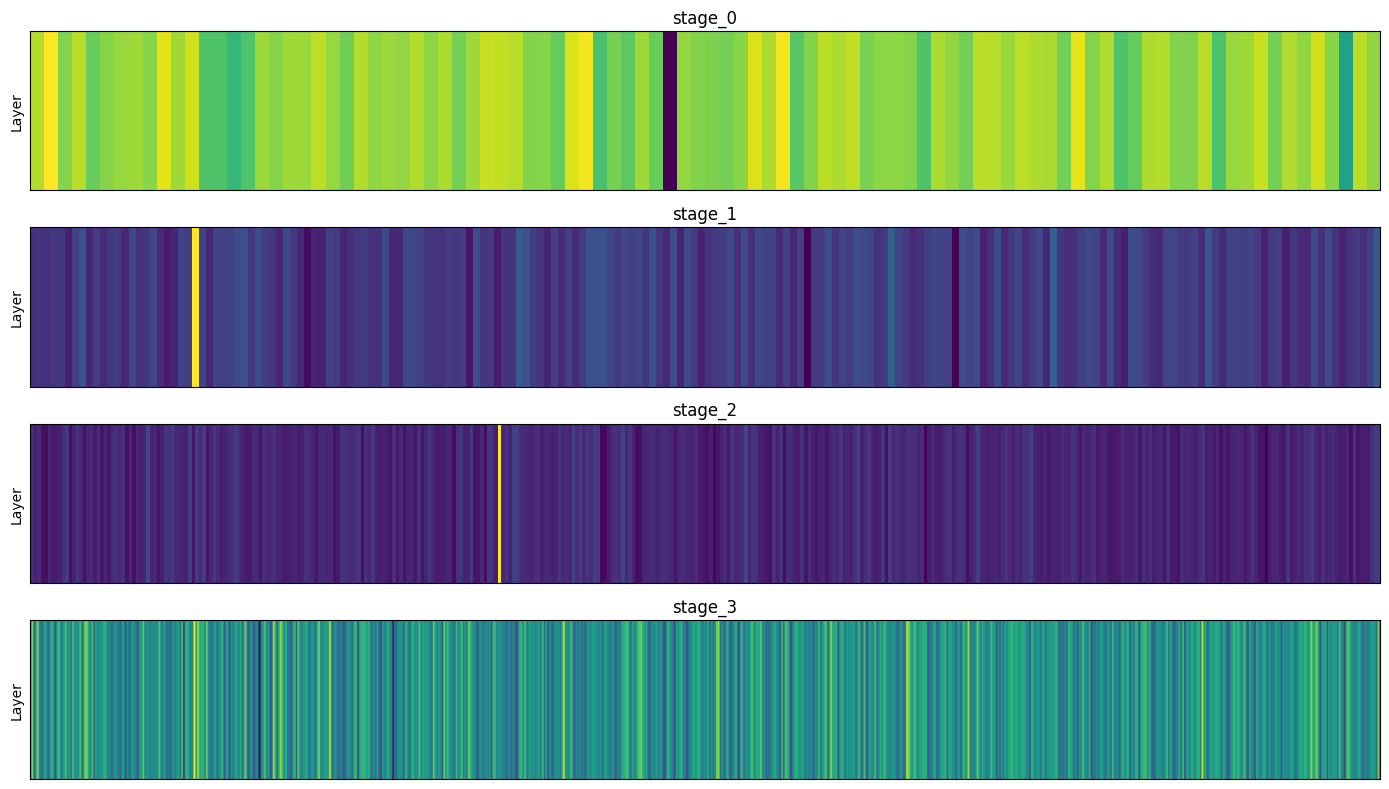

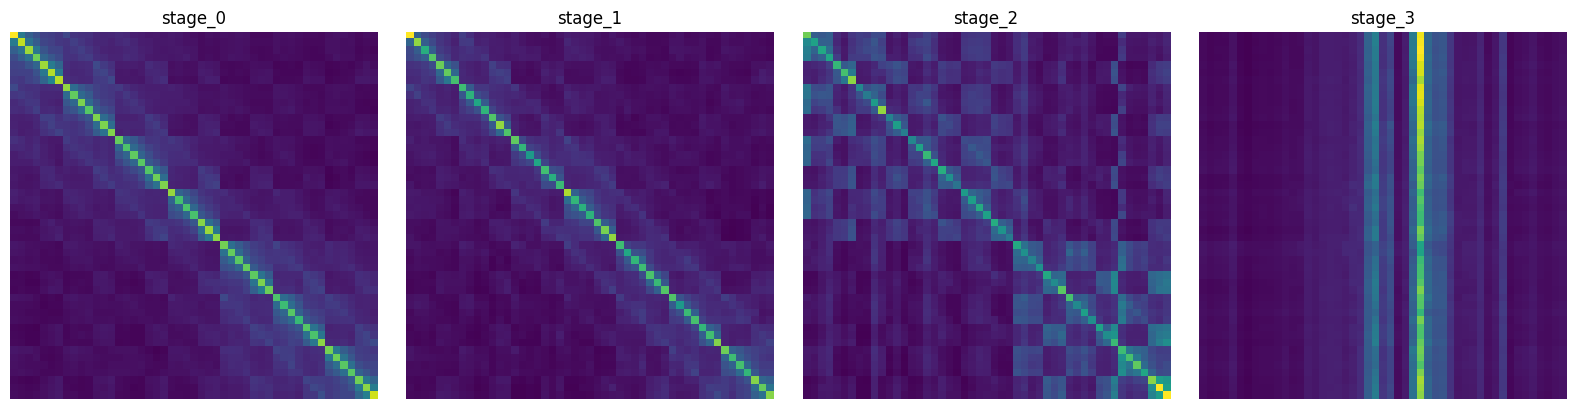

In [5]:
from visualization_utils.swin_visualization_utils import *

# Plot heatmaps for spatial attention progression
spatial_attention_progression(attn_maps)

# Plot spatial attention progression heatmaps with image overlay
image_w_spatial_attention_progression(input_tensor[0], attn_maps)

# Plot heatmaps for channel (token embedding) attention progression
channel_activation_progression(channel_acts)

# Plot attention matrix heatmaps for each major stage
attention_matrix_progression(attn_maps)